In [1]:
%pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 434.4 kB/s eta 0:00:001m459.9 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.5 MB/s eta 0:00:002.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.7 MB/s eta 0:00:003.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 1.7 MB/s eta 0:00:003.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 3.9 MB/s eta 0:00:007.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:00:10m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 1.2 MB/s eta 0:00:00m eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 1.4 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.1 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━

In [3]:
import tensorflow as tf
import os

2024-01-20 19:28:11.612483: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-20 19:28:11.657126: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-20 19:28:11.657173: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-20 19:28:11.659594: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-20 19:28:11.668635: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-20 19:28:11.669265: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2024-01-20 19:28:19.140517: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [8]:
train_dir = 'data/train'
val_dir = 'data/val'
os.listdir(train_dir)

['PNEUMONIA', 'NORMAL']

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
val_data = tf.keras.utils.image_dataset_from_directory(val_dir)
train_data = tf.keras.utils.image_dataset_from_directory(train_dir)

Found 16 files belonging to 2 classes.
Found 5216 files belonging to 2 classes.


In [9]:
train_data_iterator = train_data.as_numpy_iterator()

In [10]:
train_batch = train_data_iterator.next()
train_batch[0].shape

(32, 256, 256, 3)

In [11]:
train_batch[1]

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0], dtype=int32)

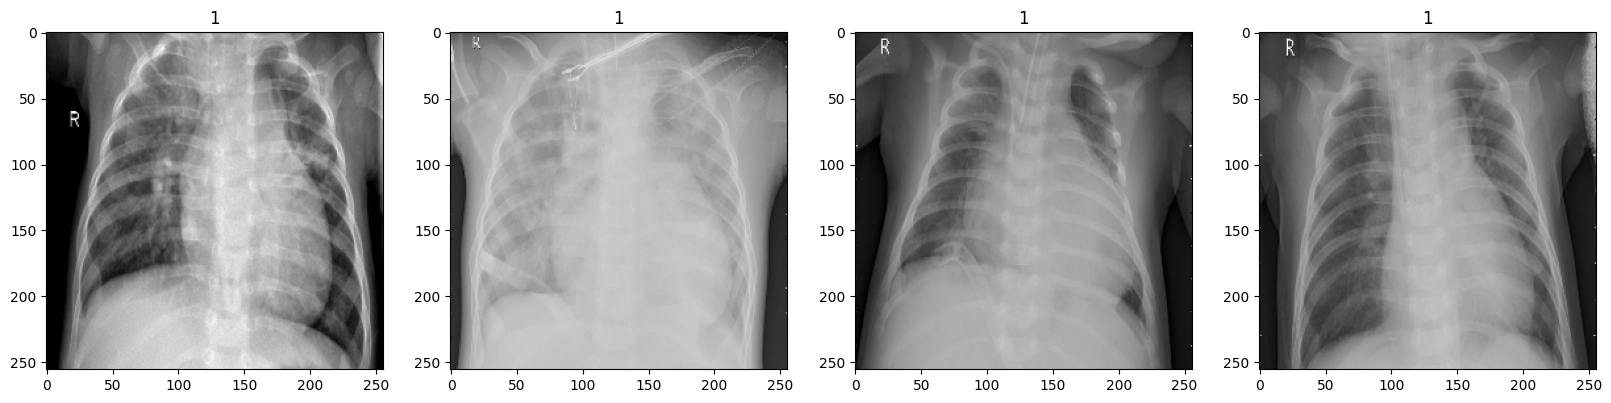

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(train_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train_batch[1][idx])

In [13]:
train_data = train_data.map(lambda x,y: (x/255, y))
val_data = val_data.map(lambda x,y: (x/255, y))

In [14]:
val_data.as_numpy_iterator().next()[0].max()

1.0

In [15]:
train = train_data.take(int(len(train_data)))
val= val_data.take(int(len(val_data)))

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [22]:
log_directory='logs'

In [24]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_directory)

In [25]:
hist = model.fit(train, epochs=11, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/11


2024-01-20 19:37:01.938141: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 132128768 exceeds 10% of free system memory.
2024-01-20 19:37:02.614822: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 132128768 exceeds 10% of free system memory.


  1/163 [..............................] - ETA: 6:04 - loss: 0.6932 - accuracy: 0.4062

2024-01-20 19:37:02.909683: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 132128768 exceeds 10% of free system memory.
2024-01-20 19:37:03.410051: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 132128768 exceeds 10% of free system memory.


  2/163 [..............................] - ETA: 1:56 - loss: 0.7458 - accuracy: 0.5625

2024-01-20 19:37:03.634703: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 132128768 exceeds 10% of free system memory.


163/163 [==============================] - 106s 642ms/step - loss: 0.2109 - accuracy: 0.9156 - val_loss: 0.3050 - val_accuracy: 0.8750
Epoch 2/11
163/163 [==============================] - 93s 563ms/step - loss: 0.1021 - accuracy: 0.9651 - val_loss: 0.2501 - val_accuracy: 0.8750
Epoch 3/11
163/163 [==============================] - 90s 546ms/step - loss: 0.0682 - accuracy: 0.9745 - val_loss: 0.1423 - val_accuracy: 0.9375
Epoch 4/11
163/163 [==============================] - 92s 561ms/step - loss: 0.0591 - accuracy: 0.9781 - val_loss: 0.3091 - val_accuracy: 0.8125
Epoch 5/11
163/163 [==============================] - 93s 563ms/step - loss: 0.0455 - accuracy: 0.9849 - val_loss: 0.1597 - val_accuracy: 0.9375
Epoch 6/11
163/163 [==============================] - 92s 557ms/step - loss: 0.0505 - accuracy: 0.9791 - val_loss: 0.3297 - val_accuracy: 0.8125
Epoch 7/11
163/163 [==============================] - 91s 554ms/step - loss: 0.0288 - accuracy: 0.9898 - val_loss: 0.1849 - val_accuracy: 0.

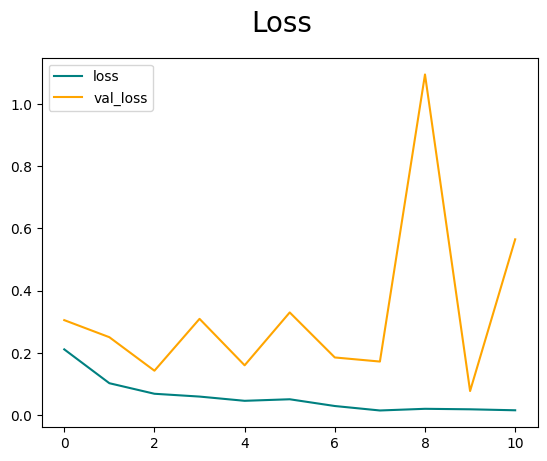

In [26]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

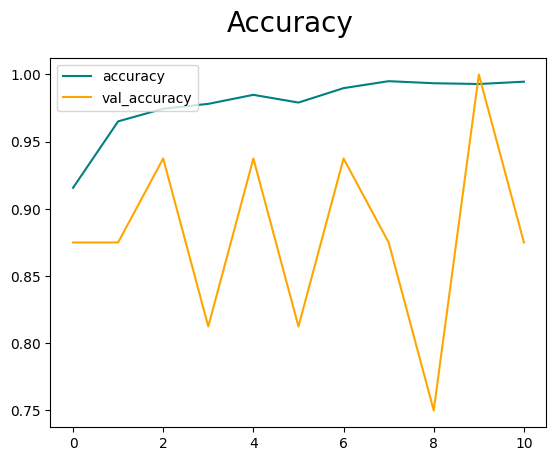

In [27]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [28]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [29]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
test_data = tf.keras.utils.image_dataset_from_directory('data/test')

Found 624 files belonging to 2 classes.


In [32]:
test_data = test_data.map(lambda x,y: (x/255, y))
test_data.as_numpy_iterator().next()
test = test_data.take(int(len(test_data)))

In [33]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 106ms/step


In [34]:
f1_score = (2 * (pre.result().numpy() * re.result().numpy())) / (pre.result().numpy() + re.result().numpy())
f1_score

0.8278074377263622

In [35]:
print(f'Recall: {re.result().numpy()},Accuracy: {acc.result().numpy()},Precision: {pre.result().numpy()}')

Recall: 0.9923076629638672,Accuracy: 0.7419871687889099,Precision: 0.710091769695282
